## Introduction: 
**The main purpose of this project is to get a quick overview of the characteristic of the google play store app. I will try to generalize the characteristic of a good app, as well as getting the pricing strategy on the market.**

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import plotly.plotly as py
import plotly.graph_objs as go

**First we load our data set**

In [14]:
data = pd.read_csv ('googleplaystore.csv')

In [15]:
data.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [16]:
data.shape

(10841, 13)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Data Cleaning

As we can see from our data info, there is several problems with our data set: 

1) There are a lot of duplicates and NaN data. We should remove these 

2) Installs is present as string values, which does not make much sense. We need to change it into interger. 

3) Size column is also an issue. From the sample above we can see that the size column contain multiple different measurement units: KB, MB, varies, etc. We need to convert it into a single measurement value, which in this case is MB.

In [18]:
# remove all the app that has no rating available 
data = data.dropna(subset = ['Rating'])
data.drop_duplicates(subset = 'App', inplace = True)

**Now we proceed to clean the Installs column**

In [19]:
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x) #remove the + sign from the installs colummn 
data['Installs'] = data['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x) #remove the , sign from the installs column
index = data[data['App'] == 'Life Made WI-Fi Touchscreen Photo Frame'].index
data.drop(index, inplace = True) #here after I try to convert the Installs column into interger, there was row carry the string value 'Free', which cannot be converted to Int. Hence, I removed it from the data set. 
data['Installs'] = data['Installs'].apply(lambda x: int(x))

In [20]:
data.info() #Now we have cleaned the installs column. Let's move on to the Size column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 13 columns):
App               8196 non-null object
Category          8196 non-null object
Rating            8196 non-null float64
Reviews           8196 non-null object
Size              8196 non-null object
Installs          8196 non-null int64
Type              8196 non-null object
Price             8196 non-null object
Content Rating    8196 non-null object
Genres            8196 non-null object
Last Updated      8196 non-null object
Current Ver       8192 non-null object
Android Ver       8194 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 896.4+ KB


In [21]:
data.sample(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8107,Shadowverse CCG,GAME,4.2,47340,61M,1000000,Free,0,Teen,Card,"July 30, 2018",2.2.15,4.1 and up
9731,Operate Now: Hospital,FAMILY,4.3,254861,52M,10000000,Free,0,Teen,Simulation,"August 1, 2018",1.20.3,4.4 and up
5778,ByssWeather for Wear OS,WEATHER,4.2,19666,Varies with device,1000000,Free,0,Everyone,Weather,"April 11, 2018",Varies with device,Varies with device
1267,30 Day Fitness Challenge - Workout at Home,HEALTH_AND_FITNESS,4.8,471036,Varies with device,10000000,Free,0,Everyone,Health & Fitness,"August 3, 2018",Varies with device,4.0 and up
3234,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
2849,YouCam Perfect - Selfie Photo Editor,PHOTOGRAPHY,4.5,1579287,Varies with device,100000000,Free,0,Everyone,Photography,"July 25, 2018",Varies with device,Varies with device
2907,EyeEm - Camera & Photo Filter,PHOTOGRAPHY,4.2,215343,44M,10000000,Free,0,Everyone,Photography,"July 14, 2018",6.4.3,4.0.3 and up
3681,HD Movie Video Player,VIDEO_PLAYERS,4.5,18699,4.1M,1000000,Free,0,Everyone,Video Players & Editors,"March 27, 2018",1.0,4.0.3 and up
7094,CA World '17,PRODUCTIVITY,3.7,7,18M,1000,Free,0,Teen,Productivity,"June 10, 2018",7.17.2.0,5.0 and up
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201k,100000,Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up


In [22]:
data['Size'] = data['Size'].apply(lambda x: x.replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: x.replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x.replace('k', ''))/1000 if 'k' in str(x) else x)
data = data[data['Size'] != 'NaN']
data['Size'] = data['Size'].apply(lambda x: float(x))

In [23]:
data['Price'] =data['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
data['Price'] = data['Price'].apply(lambda x: x.replace('.','') if '.' in str(x) else x)
data['Price'] = data['Price'].apply(lambda x: float(x)/100)

In [24]:
data['Reviews'] = data['Reviews'].apply(lambda x: float(x))
data.info()
data.sample(400)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7027 entries, 0 to 10840
Data columns (total 13 columns):
App               7027 non-null object
Category          7027 non-null object
Rating            7027 non-null float64
Reviews           7027 non-null float64
Size              7027 non-null float64
Installs          7027 non-null int64
Type              7027 non-null object
Price             7027 non-null float64
Content Rating    7027 non-null object
Genres            7027 non-null object
Last Updated      7027 non-null object
Current Ver       7023 non-null object
Android Ver       7025 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 768.6+ KB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2966,Cristiano Ronaldo Wallpaper,SPORTS,4.6,1733.0,19.000,500000,Free,0.00,Everyone,Sports,"July 17, 2018",2.1,4.1 and up
4506,Q Avatar (Avatar Maker),COMICS,4.4,2012.0,3.600,100000,Free,0.00,Everyone,Comics,"March 4, 2017",1.3.5,2.3 and up
8627,Mahalaxmi Dindarshika 2018,PRODUCTIVITY,4.2,25427.0,9.200,1000000,Free,0.00,Everyone,Productivity,"January 5, 2018",18.0,4.0 and up
8515,Download All Files,TOOLS,3.8,120494.0,2.300,10000000,Free,0.00,Everyone,Tools,"June 13, 2018",2.0.7,4.1 and up
4917,Air Conditioner Maintenance,PRODUCTIVITY,4.0,11.0,0.220,5000,Free,0.00,Everyone,Productivity,"November 27, 2015",airConditionerMaintenance_13112015,2.3.3 and up
1934,DEER HUNTER 2018,GAME,4.3,955656.0,82.000,10000000,Free,0.00,Teen,Action,"June 26, 2018",5.1.2,3.0 and up
151,Free Books - Spirit Fanfiction and Stories,BOOKS_AND_REFERENCE,4.8,116507.0,5.000,1000000,Free,0.00,Teen,Books & Reference,"August 1, 2018",2.0.075,4.0.3 and up
7325,BF CG Abstract Pictures,FAMILY,4.7,6.0,2.500,1000,Free,0.00,Teen,Entertainment,"June 19, 2015",2.7,3.0 and up
6796,Battery Notifier Pro BT,TOOLS,4.7,1363.0,1.600,10000,Paid,2.59,Everyone,Tools,"June 7, 2017",2.5.18,1.6 and up
7662,Dungeon Legends - PvP Action MMO RPG Co-op Games,FAMILY,4.4,102215.0,42.000,1000000,Free,0.00,Teen,Role Playing,"June 25, 2018",3.10,4.0.3 and up


# Basic data analysis 

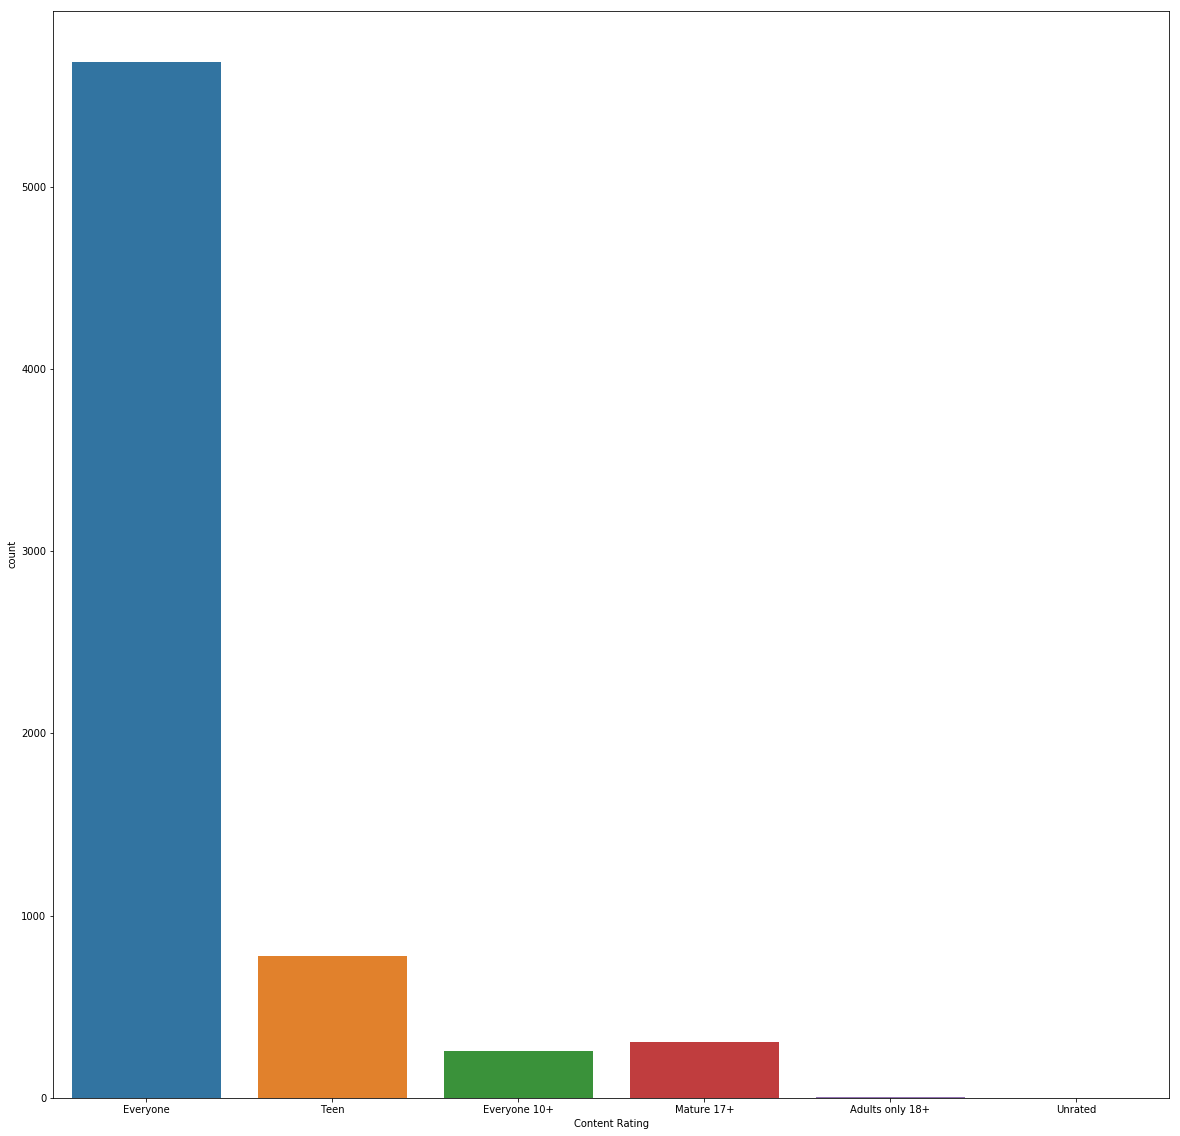

In [25]:
content = data['Content Rating'].value_counts()
plt.figure(figsize=(20,20)) 
sns.countplot(data['Content Rating'])

**Most app on the market is labeled for Everyone. This makes sense due to the fact that labeling this way makes the apps more accessible to everyone, thus increase their exposure** 

**Now only for ... research purpose, I will show you the app that label Mature and Adult**

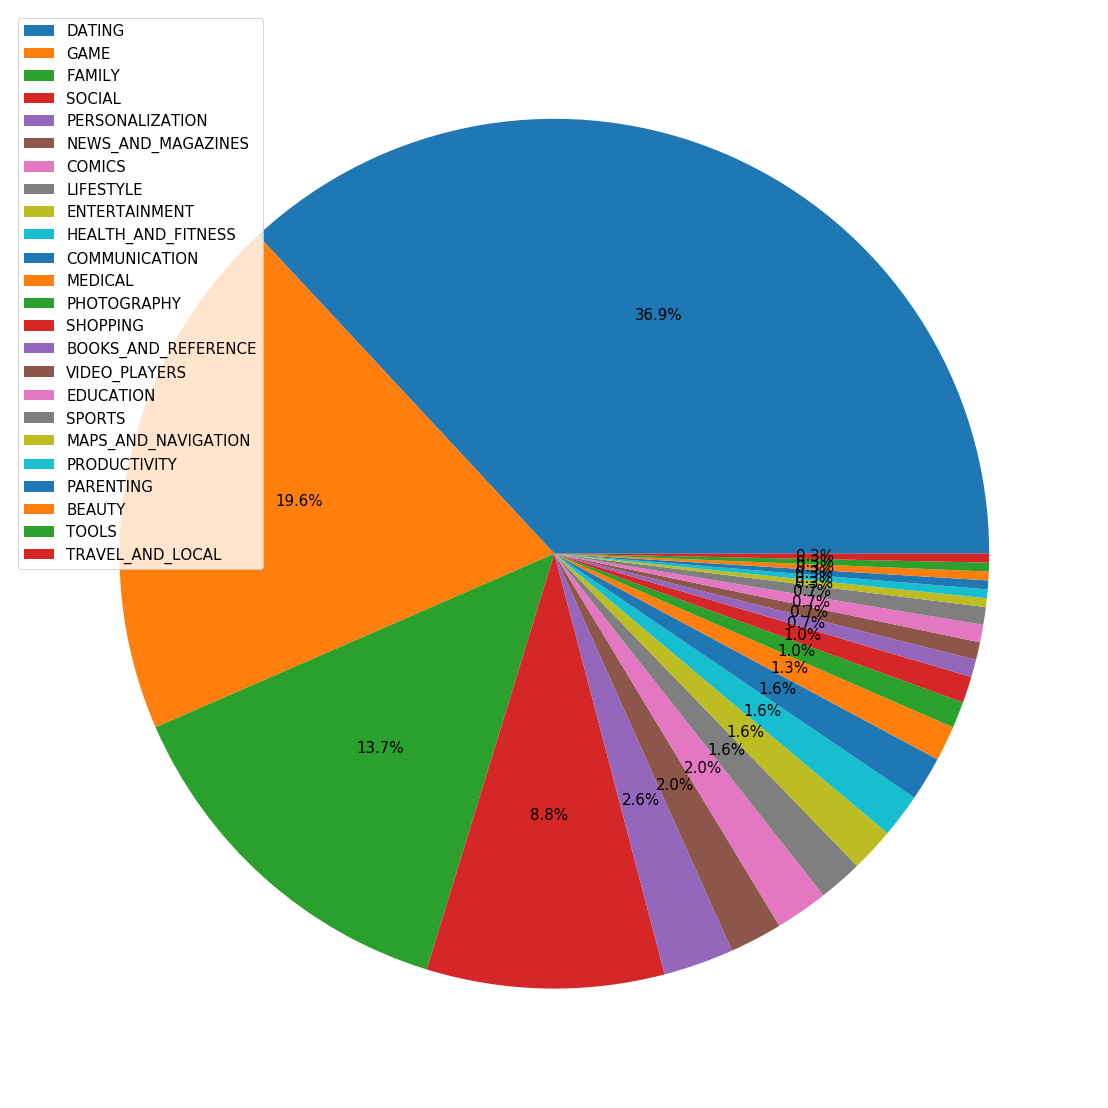

In [26]:
NSFW_mature = data[data['Content Rating'] == 'Mature 17+']
NSFW_adult = data[data['Content Rating'] == 'Adults only 18+']
NSFW_apps= pd.concat([NSFW_mature, NSFW_adult], axis=0, )
NSFW = NSFW_apps['Category'].value_counts()
plt.figure(figsize=(20,20)) 
plt.rcParams.update({'font.size': 15})
plt.pie(NSFW, autopct='%.1f%%')
plt.legend(NSFW.index, loc="upper left")
plt.show()

In [27]:
NSFW_apps['Category'].value_counts()

DATING                 113
GAME                    60
FAMILY                  42
SOCIAL                  27
PERSONALIZATION          8
NEWS_AND_MAGAZINES       6
COMICS                   6
LIFESTYLE                5
ENTERTAINMENT            5
HEALTH_AND_FITNESS       5
COMMUNICATION            5
MEDICAL                  4
PHOTOGRAPHY              3
SHOPPING                 3
BOOKS_AND_REFERENCE      2
VIDEO_PLAYERS            2
EDUCATION                2
SPORTS                   2
MAPS_AND_NAVIGATION      1
PRODUCTIVITY             1
PARENTING                1
BEAUTY                   1
TOOLS                    1
TRAVEL_AND_LOCAL         1
Name: Category, dtype: int64

**Most of the app in the Mature, Adult category is Dating apps, which is obvious. Next on the list is Game apps, which I believe were rated matured due to violence content. And for the Family app, I have zero idea what is the content inside these apps. Need further research**

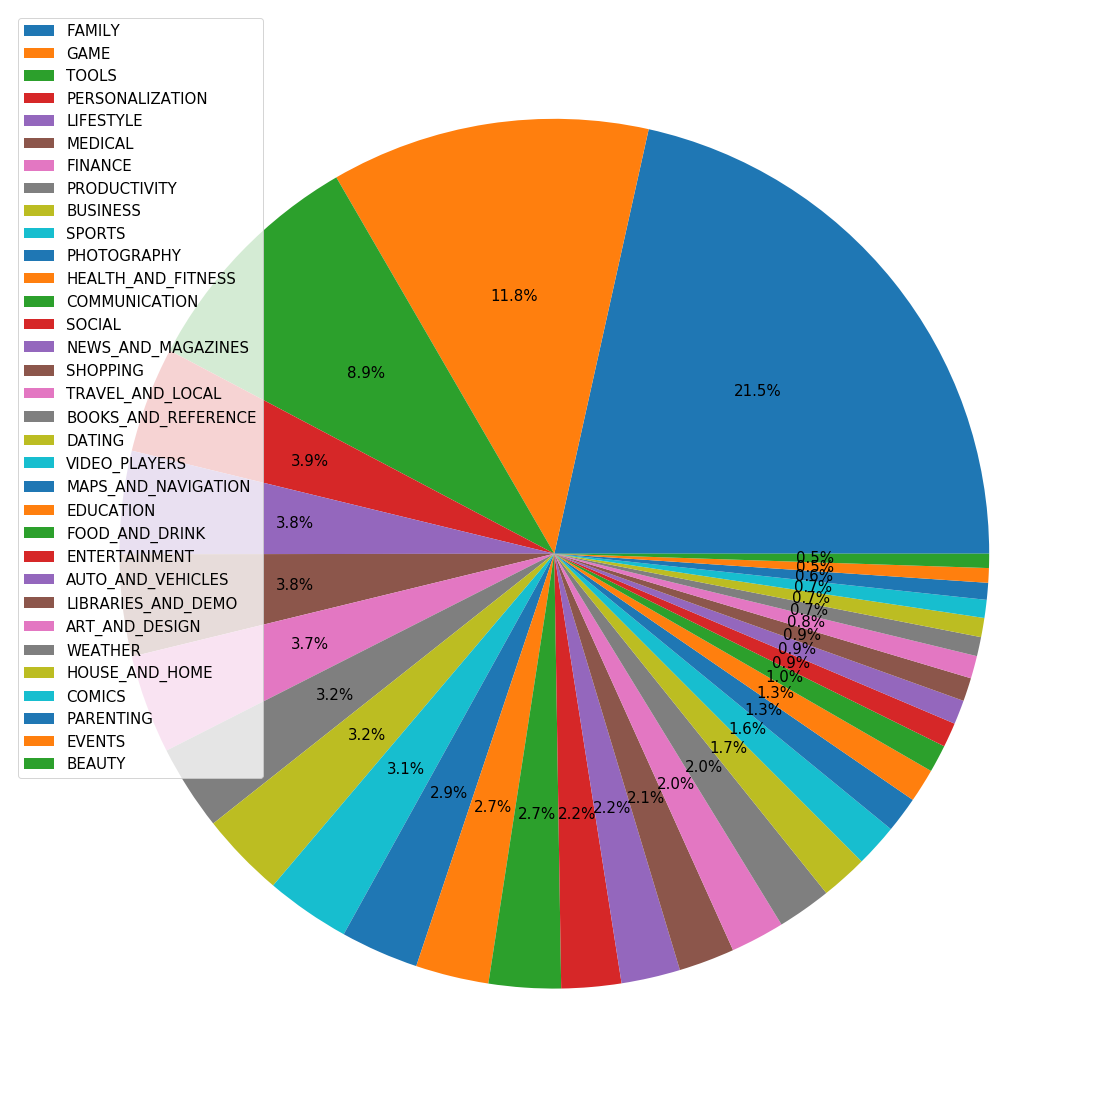

In [28]:
count = data['Category'].value_counts()
plt.figure(figsize=(20,20)) 
plt.rcParams.update({'font.size': 15})
plt.pie(count, autopct='%.1f%%')
plt.legend(count.index, loc="upper left")
plt.show()

**Family was the category that most apps fall into, which accounted for 21.5%. Follow next is the game category, and together, these top 2 category make up for more than 30% of the market share

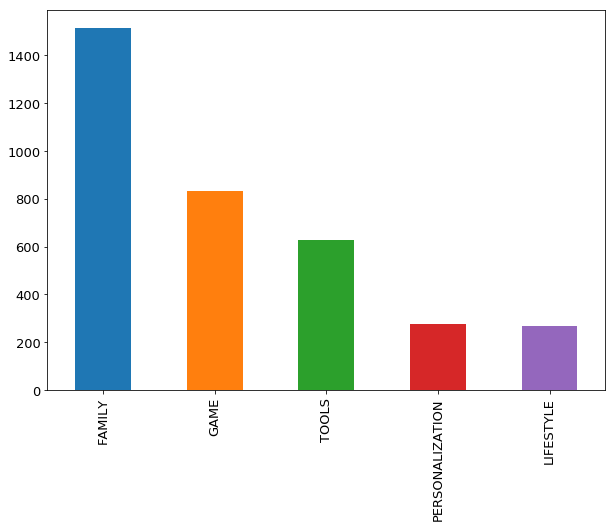

In [29]:
# plt.title('Most common type of app')

# plt.xticks(rotation=45)

top_5_common_app = data['Category'].value_counts().head()
top_5 = data [data['Category'].isin(top_5_common_app.index)]
# chart = sns.barplot(x = top_5_common.index, y = top_5_common)
# plt.ylabel('')


ap= top_5['Category'].value_counts().plot(kind='bar', figsize=(10,7),
                                         fontsize=13);
ap



In [30]:
plt.figure(figsize=(10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

### Top 5 most downloaded app

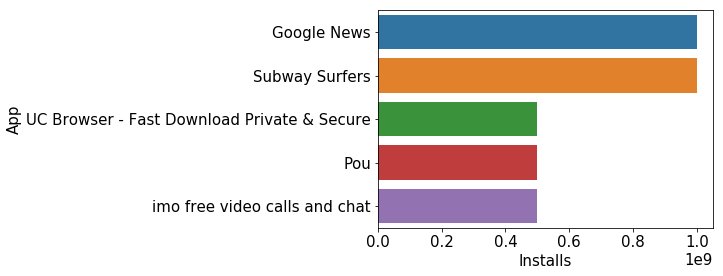

In [31]:
top_5_install = data.sort_values(by = 'Installs', ascending = False).head()
sns.barplot(y= top_5_install['App'], x = top_5_install['Installs'],orient = 'h')




**As we can see the top 2 app are Google News and Subway Surfers with more than 1,000,000,000 installations.**

## An overview of the size of the apps on the market

C:\Users\Jarvis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



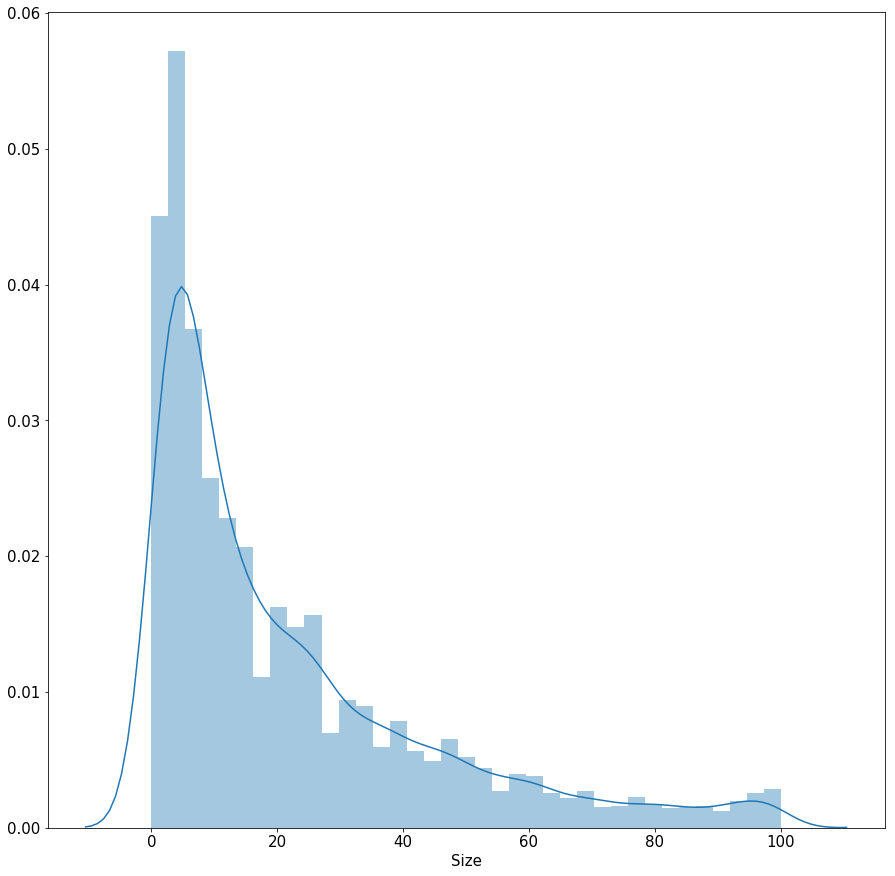

In [32]:
plt.figure(figsize=(15,15)) 
plot = sns.distplot(data['Size'])
# plot.set_yscale('log')



**From the figure above, we can see that the distribution is skew to the left. This mean that most app on the market is quite light.**

**The most common size of app on google play store is around 13MB**

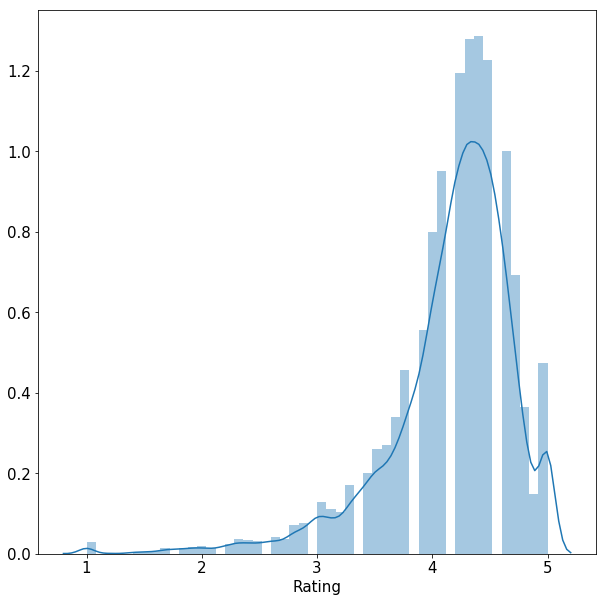

In [33]:
plt.figure(figsize=(10,10))
rating = sns.distplot(data['Rating'])

**Overall the rating of the apps are quite positive. Most app has rating around 4.1**

C:\Users\Jarvis\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



<Figure size 1440x1440 with 0 Axes>

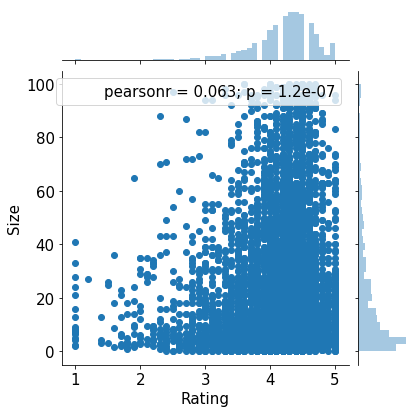

In [34]:
plt.figure(figsize = (20,20))
rating_size = sns.jointplot(x=data['Rating'], y=data['Size'], kind='scatter')
rating_size.annotate(stats.pearsonr)

**From the distribution of the scatter plot, we can see that the size partitialy affect the rating since most of the high rating apps (from 4 to 5 star) has small size (less than 20MB). However, the correlation is exemely weak**

4.160623310089655

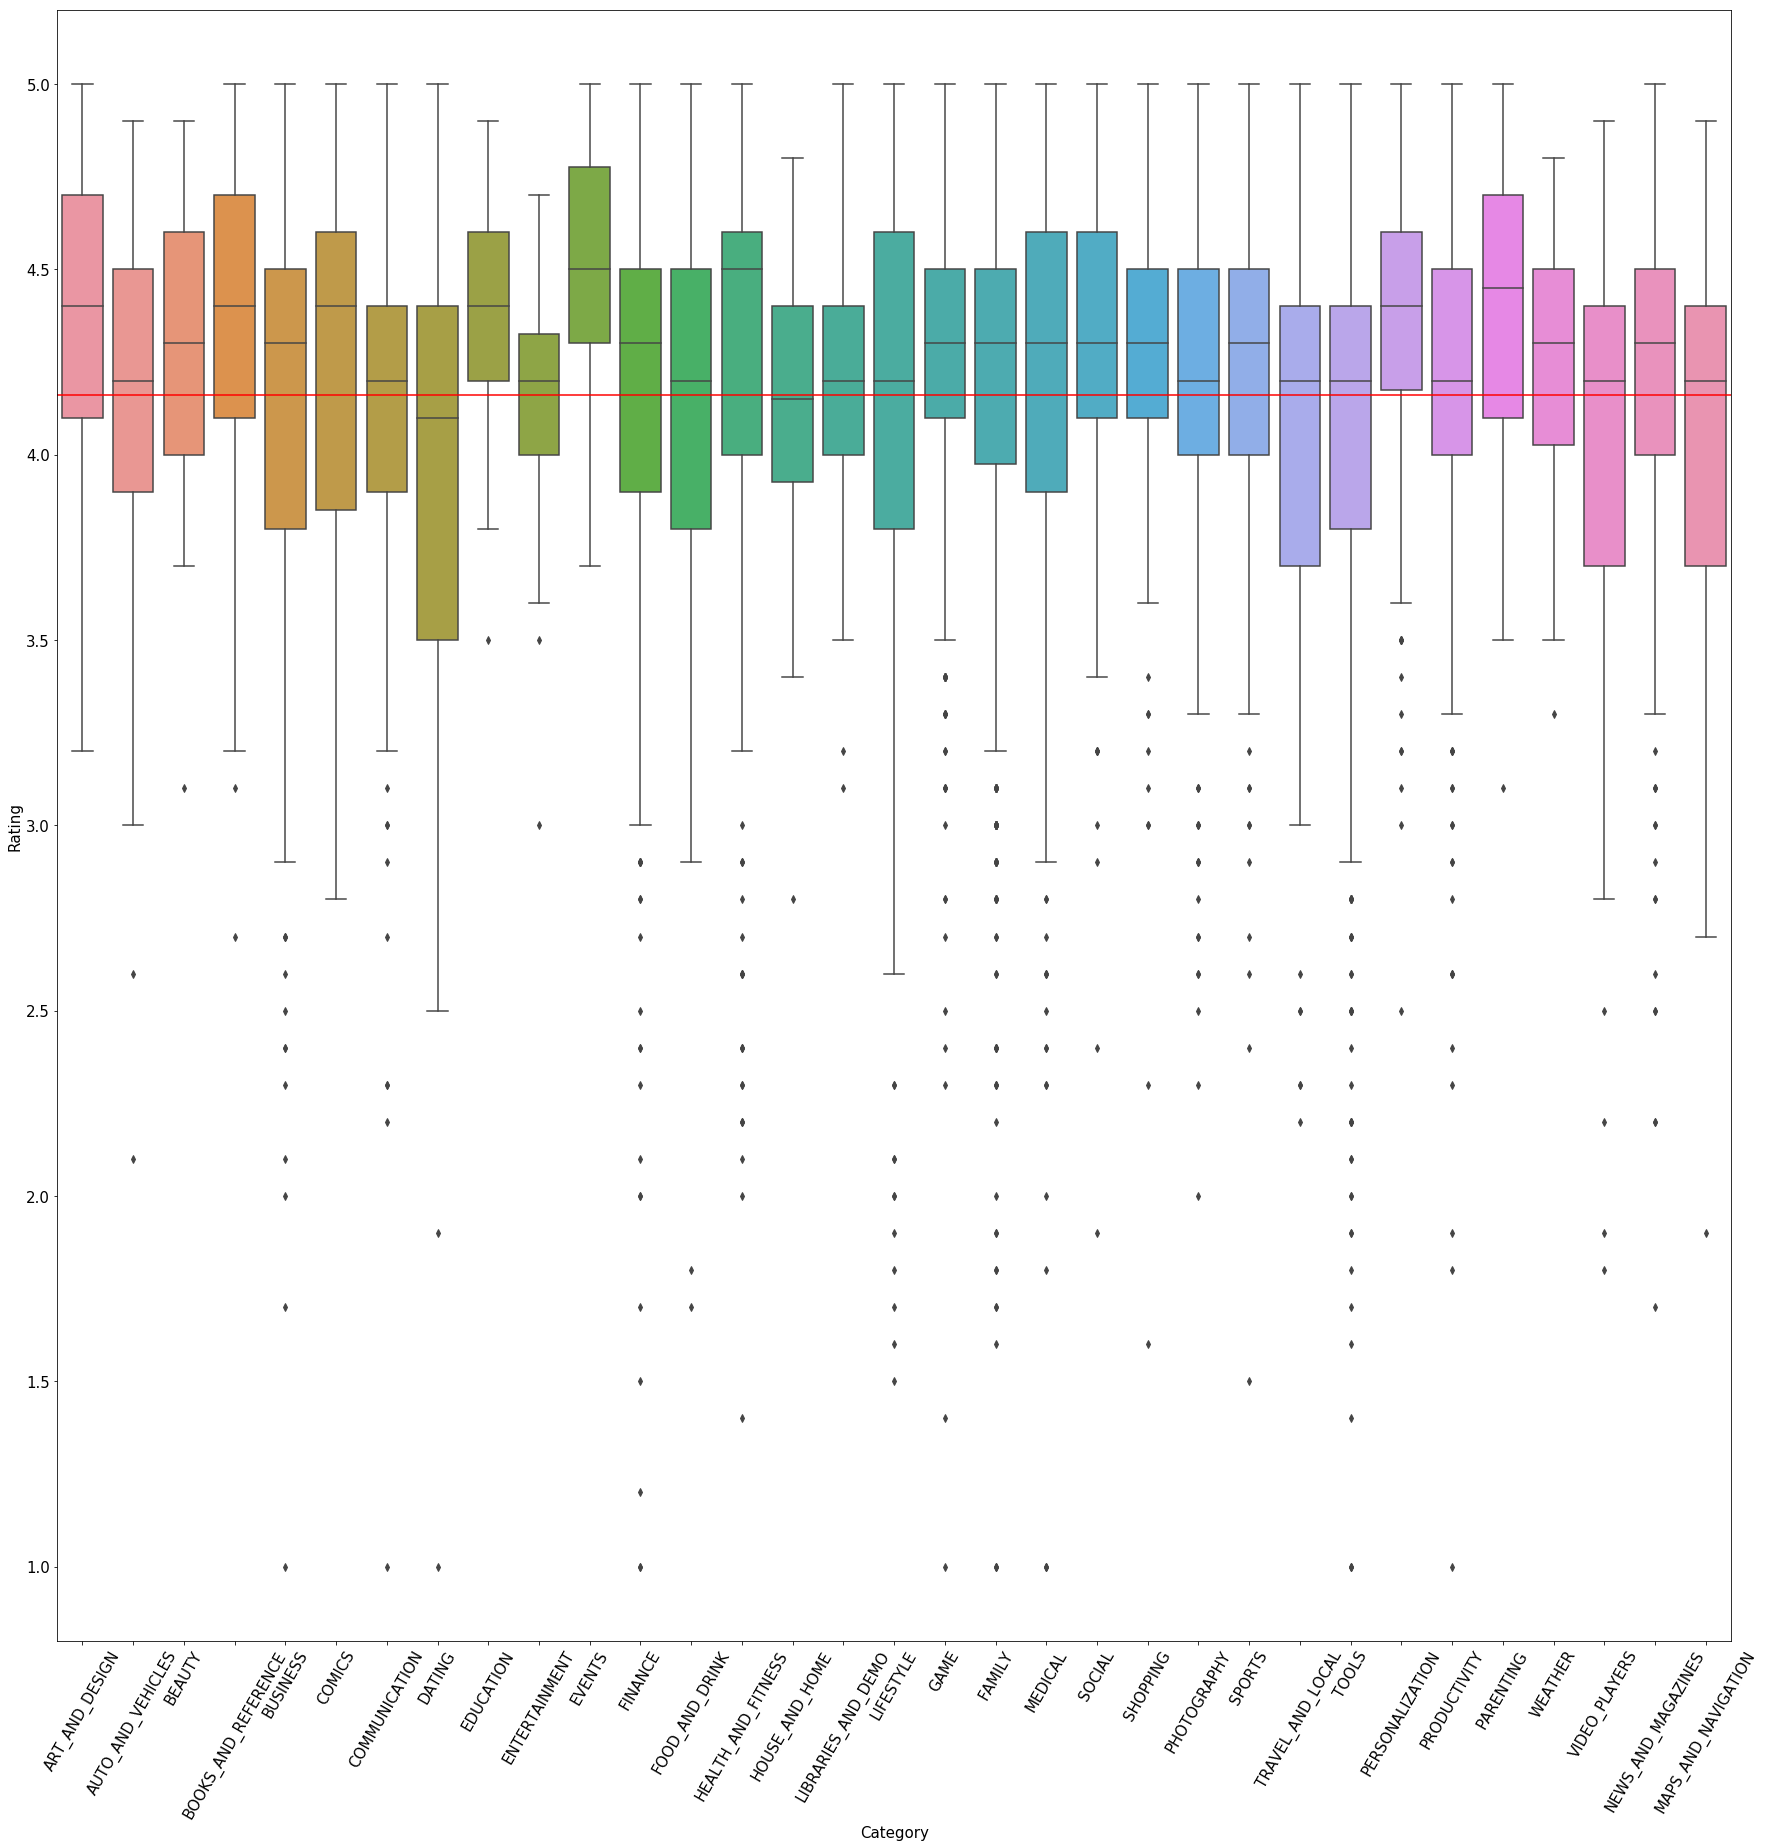

In [35]:
plt.figure(figsize = (30,30))
sns.boxplot(x ='Category', y ='Rating', data=data)
plt.xticks(rotation=60)
plt.axhline(4.160623310089655, color = 'r')
data['Rating'].mean()

**The red line show the average rating, in this case is 4.160623310089655. As we can see, most of the app has an average rating above 4.16, which reconfirm our belief that most of them has very good rating**

**Event apps has abnormal high rating, which has more than 50% of the apps received a score more than 4.5. Dating apps, however, perform the worst since more than 50% of dating app has a score lower than the average rating.**

21.754427280489537

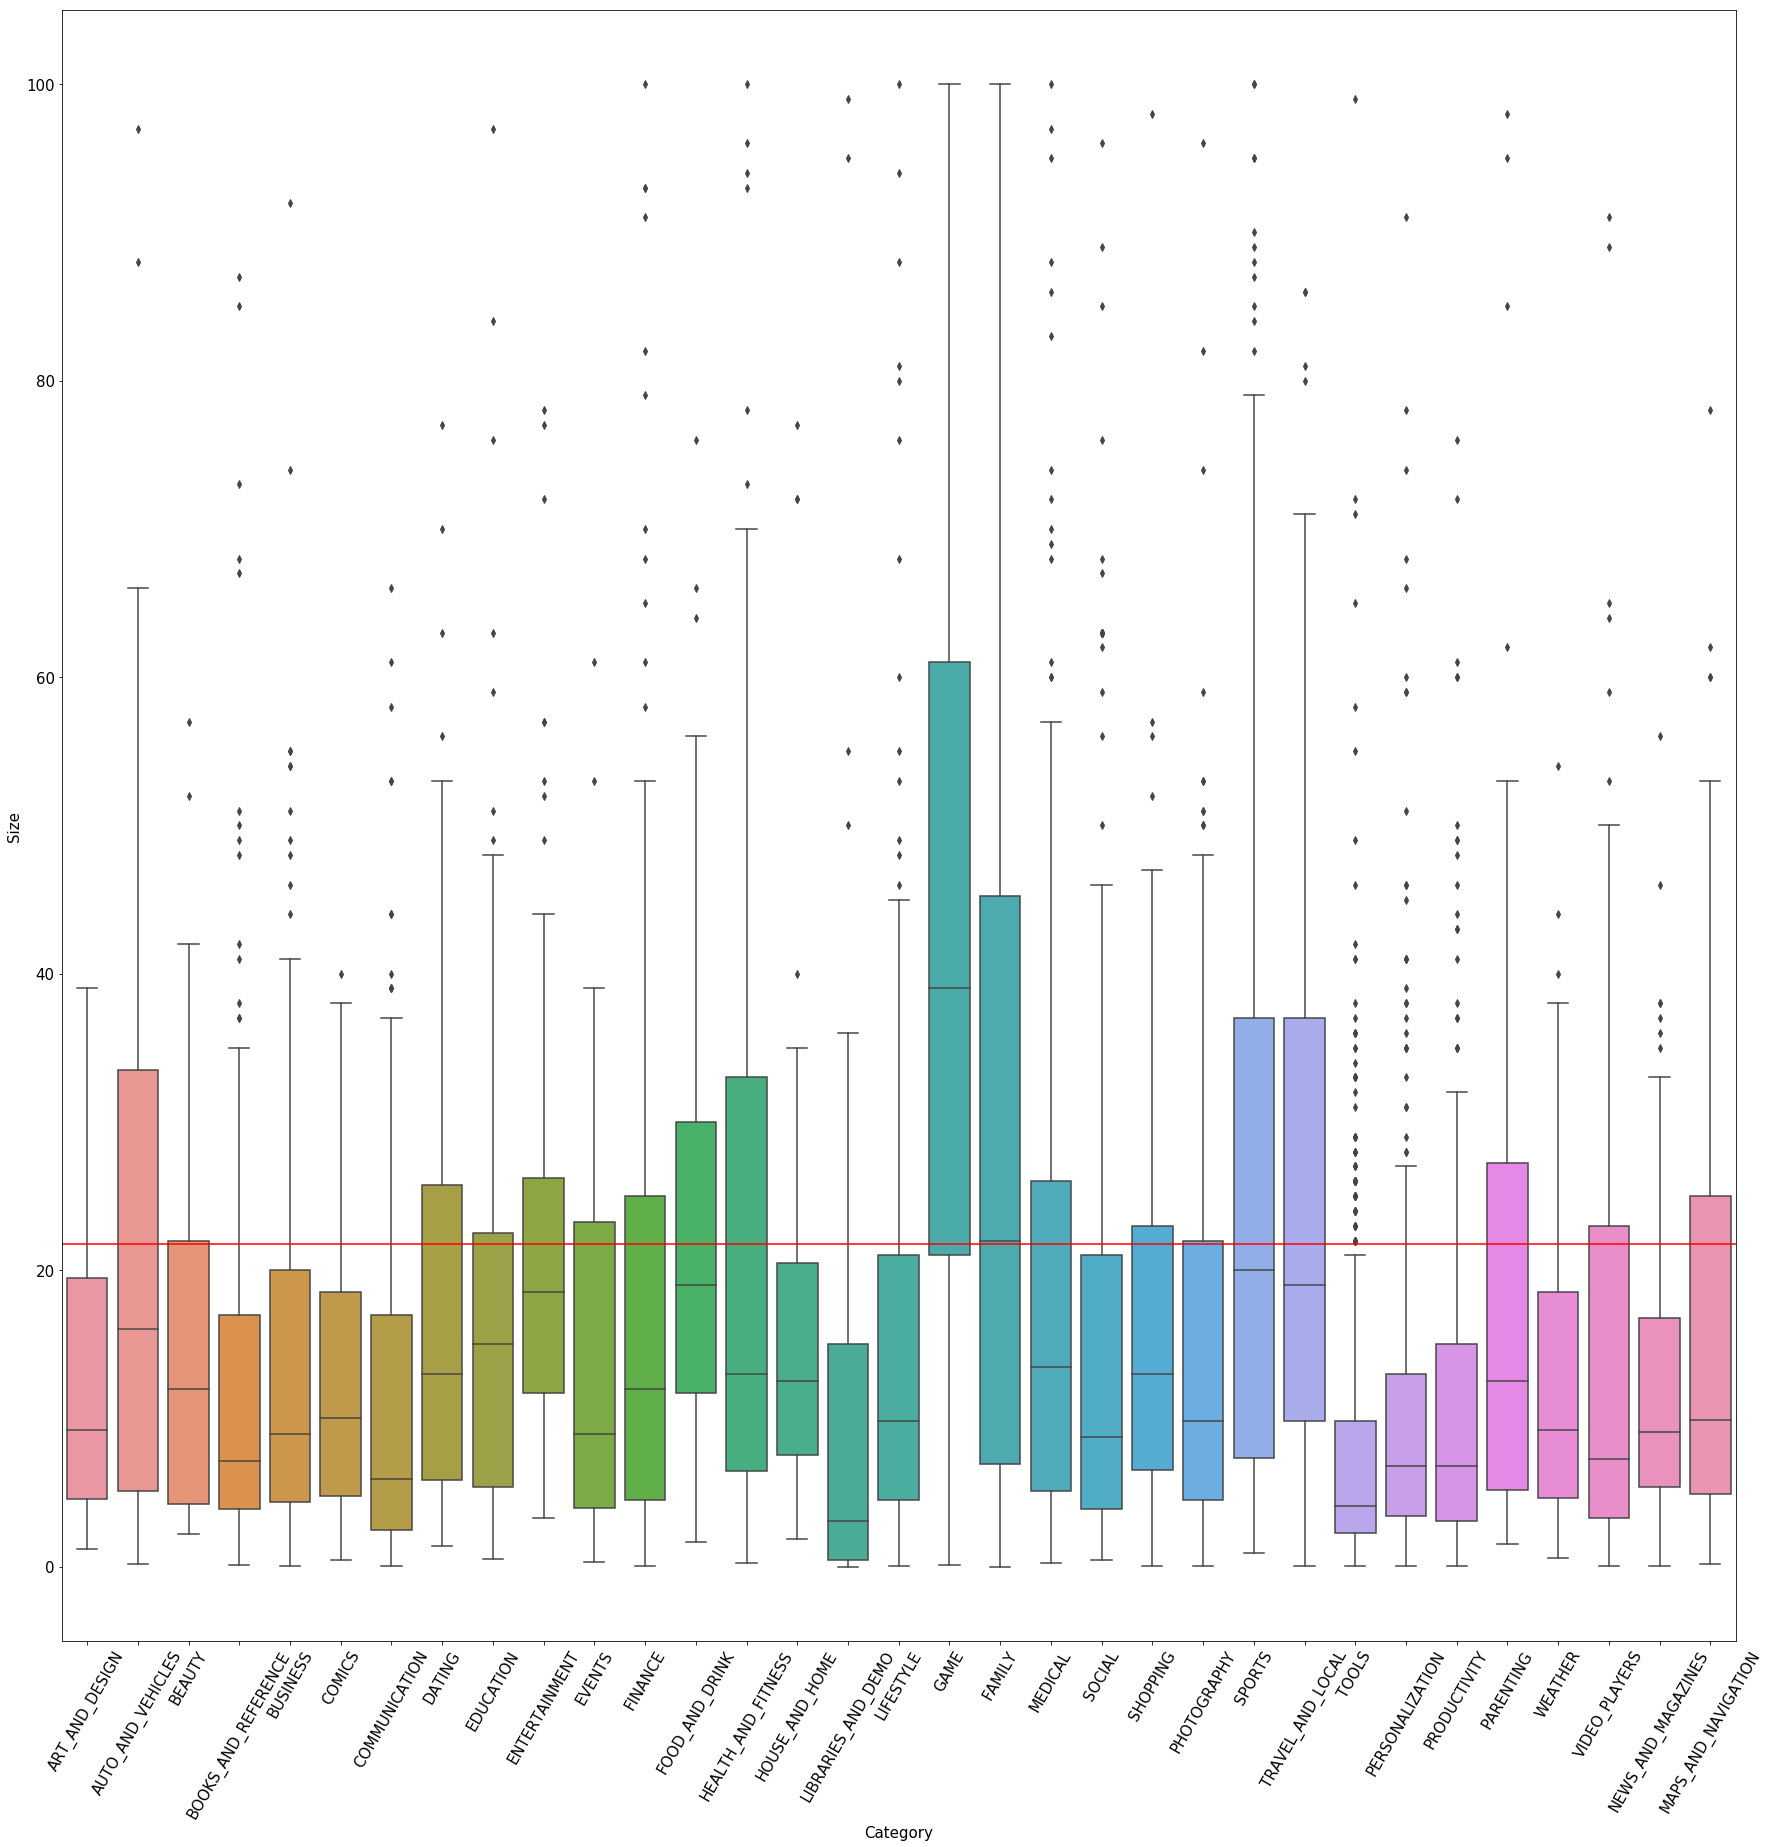

In [36]:
plt.figure(figsize = (30,30))
sns.boxplot(x ='Category', y ='Size', data=data)
plt.xticks(rotation=60)
plt.axhline(21.754427280489537, color = 'r')
data['Size'].mean()

**The average app size is 21.75. Most of the app are below the average with the only exception is the game category**

**This raise a question about the validity of our claim before that smaller app tend to get better rating, since the majority of apps has small size. However, we do know that the common app sizes is between 2MB and 20MB, which can be an important information to keep in mind when making apps.**


## Exploring the correlation 

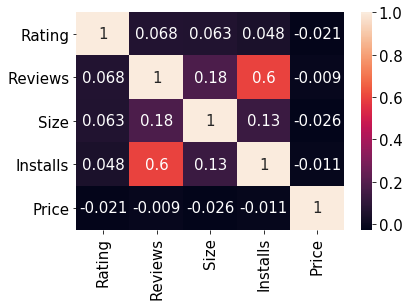

In [37]:
corr = data.corr()
sns.heatmap(corr, annot = True, color = 'b')

**This recomfirmed our belief that size is not a main factor that encourage people to install the apps but the reviews.**

Text(12.200000000000003, 0.5, 'Number of installs (Log scale)')

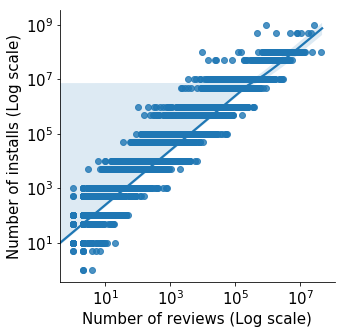

In [38]:
review_install = sns.lmplot(x='Reviews', y='Installs', data=data)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of reviews (Log scale)')
plt.ylabel('Number of installs (Log scale)')


**The positive correlation between number of installs and review show that apps which has more review are more likely to be downloaded. We also can understand in a different way that app has high traffic will be more likely to receive more ratings**

## Pricing effect on rating 

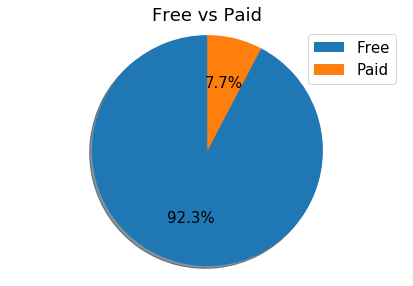

In [39]:
labels = ['Free', 'Paid']
fig1, ax1 = plt.subplots()
ax1.pie(data['Type'].value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(labels)
ax1.set_title("Free vs Paid")
plt.show()

**From the sample we can see that more than 90% of the apps on the market are free, only 7.7% of them are paid** 

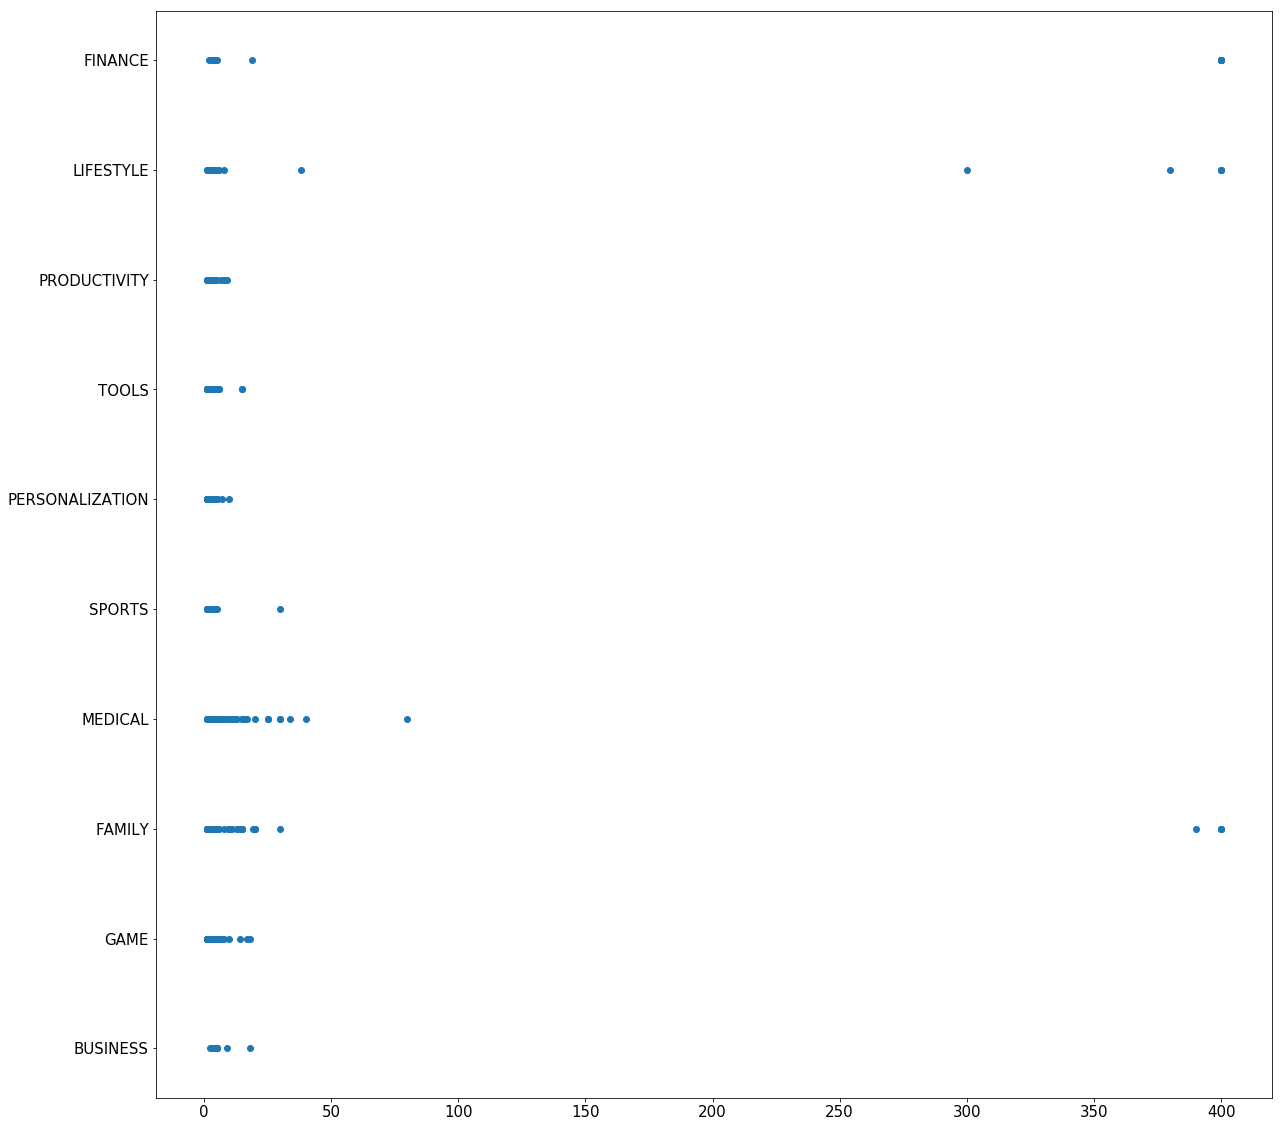

In [40]:
top_10_common = data['Category'].value_counts().head(10)

top_10_cate = data [data['Category'].isin(top_10_common.index)]
not_free = top_10_cate[top_10_cate['Price'] > 0]
plt.figure(figsize = (20,20))
plt.scatter(x= 'Price', y='Category', data=not_free)

**Paid apps price usually below $30. However, there are some unsually high price app, which are more than 250 dollar. Let's find these app**

In [41]:
pricey_apps = data[data['Price'] > 200]
pricey_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1.500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26.000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1.800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8.700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2.600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2.900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22.000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,0.965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


**Apparently all of these apps are I am rich app, which are the trash apps**

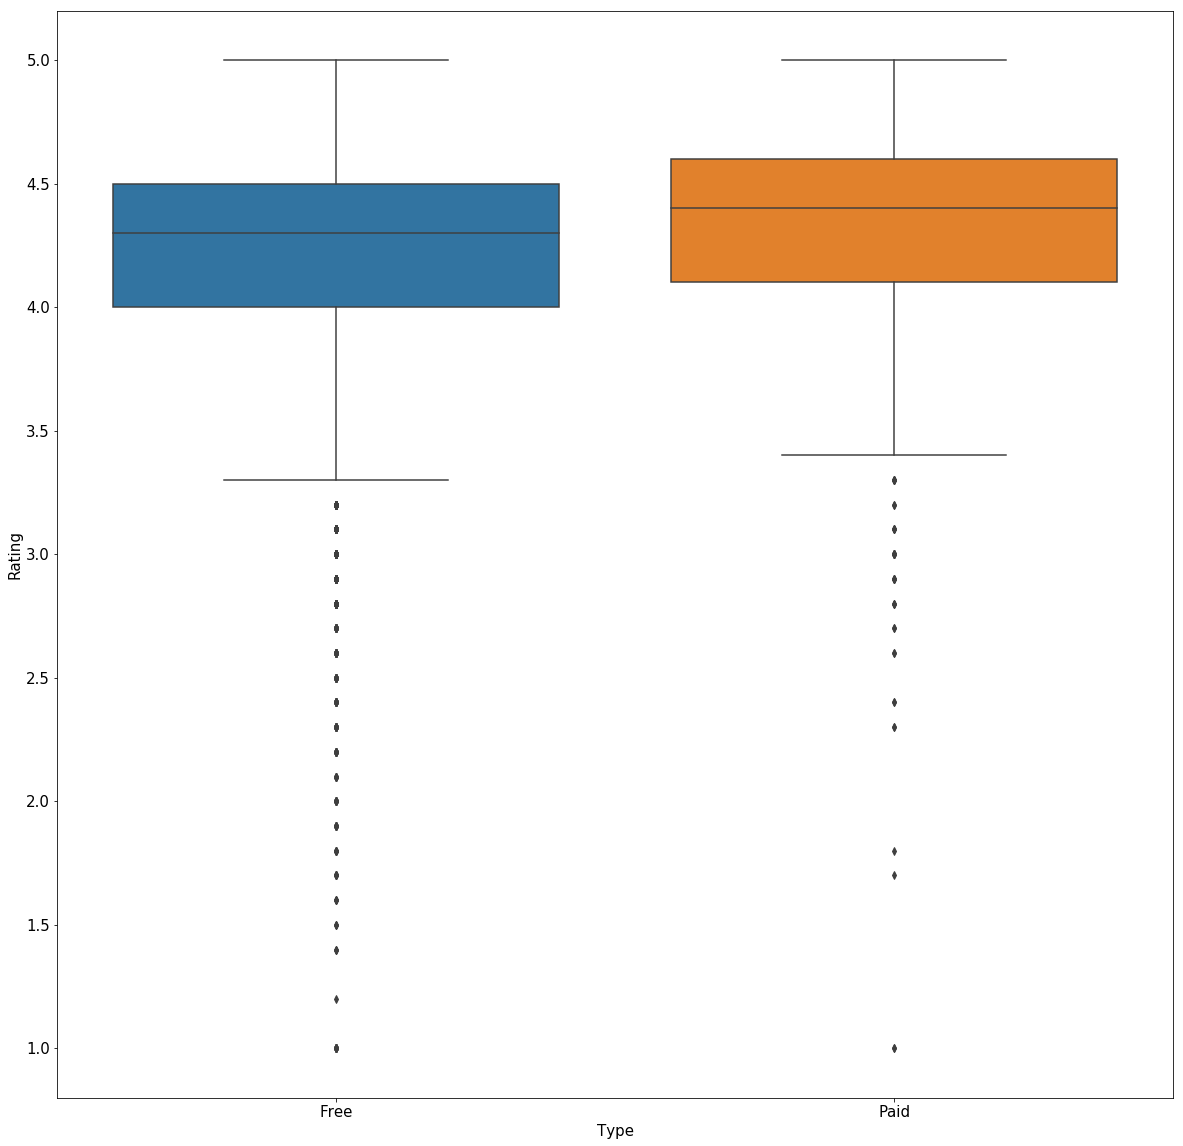

In [48]:
plt.figure(figsize = (20,20))
sns.boxplot(x ='Type',y ='Rating', data=data)


**Paid app has slightly better raing than Free app. One of the explanation can be that free app usually has a lot more trash app, which reduce the overall rating**


Text(0.5, 1.0, 'Instalation between free and paid apps')

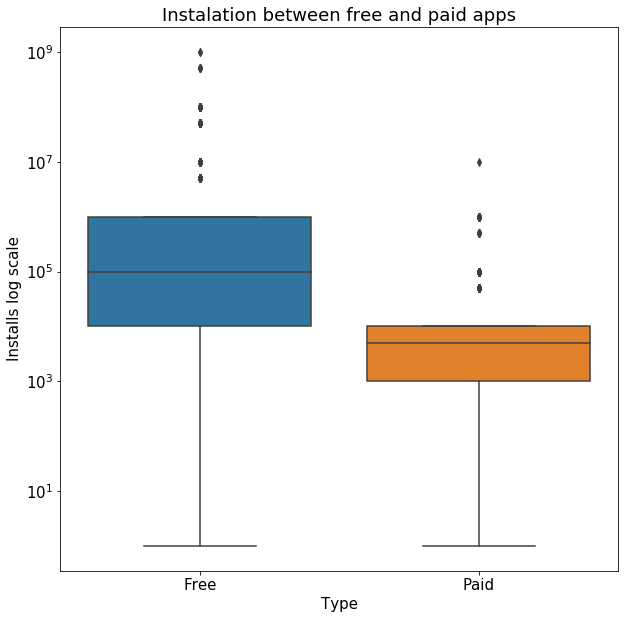

In [44]:
plt.figure(figsize=(10,10))
sns.boxplot(x ='Type',y ='Installs', data=data)
plt.yscale('log')
plt.ylabel('Installs log scale')
plt.title('Instalation between free and paid apps')


**The result is quite preditable, free app has more downloads than paid apps. However, the difference is not too big, which signals a really good performance for pay apps category.**

## Sentimental Analysis

In [49]:
review_data = pd.read_csv('googleplaystore_user_reviews.csv')

In [50]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [51]:
merged_df = pd.merge(data, review_data, on = "App", how = "inner")
merged_df.head(900)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
6,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
7,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,omgggggg,Neutral,0.000000,0.000000
8,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It cute.,Positive,0.500000,1.000000
9,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love,Positive,0.500000,0.600000


In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41150 entries, 0 to 41149
Data columns (total 17 columns):
App                       41150 non-null object
Category                  41150 non-null object
Rating                    41150 non-null float64
Reviews                   41150 non-null float64
Size                      41150 non-null float64
Installs                  41150 non-null int64
Type                      41150 non-null object
Price                     41150 non-null float64
Content Rating            41150 non-null object
Genres                    41150 non-null object
Last Updated              41150 non-null object
Current Ver               41150 non-null object
Android Ver               41150 non-null object
Translated_Review         24069 non-null object
Sentiment                 24072 non-null object
Sentiment_Polarity        24072 non-null float64
Sentiment_Subjectivity    24072 non-null float64
dtypes: float64(6), int64(1), object(10)
memory usage: 5.7+ MB


In [53]:
sentiment_dummies = pd.get_dummies(merged_df['Sentiment'])
#Create dummies variable out of sentiment variable 

In [54]:
merged_df= pd.concat([merged_df, sentiment_dummies], axis=1, )
#Join the dummies we just created to the main dataframe
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,1,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,1,0,0
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,0,1,0
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN,0,0,0
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,0,0,1


In [58]:
sort_sentiment = merged_df.groupby(by='Category').sum()[['Negative','Neutral','Positive']]
sort_sentiment.head()
#We sum up the value in each dummies column and group them by the category 

,Negative,Neutral,Positive
Category,,,
ART_AND_DESIGN,58.0,54.0,233.0
AUTO_AND_VEHICLES,11.0,20.0,133.0
BEAUTY,57.0,83.0,162.0
BOOKS_AND_REFERENCE,23.0,52.0,200.0
BUSINESS,111.0,131.0,413.0


In [60]:
trans_category_sentiment = sort_sentiment.transpose(copy=True)
trans_category_sentiment
#Create a copy and then transpose the data (convert from verticle to horizontal)

Category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
Negative,58.0,11.0,57.0,23.0,111.0,0.0,59.0,291.0,56.0,140.0,...,120.0,140.0,77.0,132.0,77.0,235.0,112.0,177.0,37.0,9.0
Neutral,54.0,20.0,83.0,52.0,131.0,4.0,74.0,249.0,69.0,137.0,...,125.0,113.0,70.0,102.0,38.0,134.0,179.0,136.0,38.0,17.0
Positive,233.0,133.0,162.0,200.0,413.0,6.0,261.0,960.0,342.0,377.0,...,572.0,438.0,280.0,350.0,195.0,542.0,493.0,475.0,123.0,83.0


In [61]:
for col in trans_category_sentiment.columns:
    trans_category_sentiment[col] = trans_category_sentiment[col] / trans_category_sentiment[col].sum()*100
#Select each collumn in the trans_category_sentiment dataframe.

In [62]:
trans_category_sentiment

Category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
Negative,16.811594,6.707317,18.874172,8.363636,16.946565,0.0,14.974619,19.4,11.991435,21.406728,...,14.687882,20.260492,18.032787,22.602740,24.838710,25.795829,14.285714,22.461929,18.686869,8.256881
Neutral,15.652174,12.195122,27.483444,18.909091,20.000000,40.0,18.781726,16.6,14.775161,20.948012,...,15.299878,16.353111,16.393443,17.465753,12.258065,14.709111,22.831633,17.258883,19.191919,15.596330
Positive,67.536232,81.097561,53.642384,72.727273,63.053435,60.0,66.243655,64.0,73.233405,57.645260,...,70.012240,63.386397,65.573770,59.931507,62.903226,59.495060,62.882653,60.279188,62.121212,76.146789


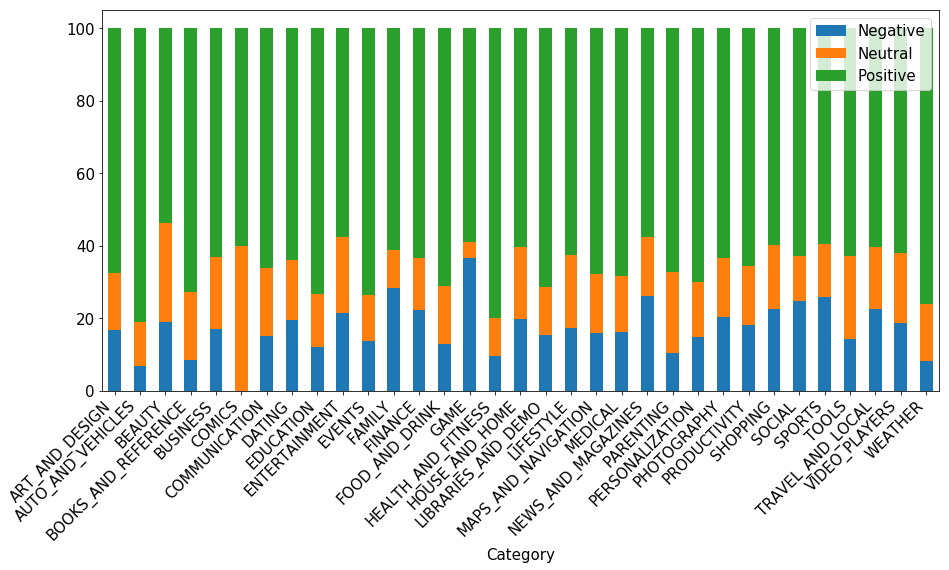

In [63]:
trans_category_sentiment.T.plot(kind = 'bar', stacked=True, figsize=(15,7), rot=45)

plt.xticks(horizontalalignment='right')
plt.show()

**Most of the review are positive reviews, which account roughly more than 60%. Negative review usually account for less than 20%, except for the Game category, whose 30% share of review is negative**

In [108]:
import nltk

nltk.download('stopwords')
from collections import Counter
from nltk.corpus import stopwords
merged_df = merged_df.dropna()
stop = stopwords.words('english')
stop = stop + ['app', 'APP' ,'ap', 'App', 'apps','app.', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher','it.','It','I','The','game','get','This','time','would','ads']

vocab = Counter()
for twit in merged_df['Translated_Review']:
    for word in twit.split(' '):
        vocab[word.lower()] += 1 
vocab.most_common(20)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jarvis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('i', 20968),
 ('game', 5459),
 ('the', 3607),
 ('like', 3492),
 ('love', 3148),
 ('get', 3103),
 ('it', 2983),
 ('good', 2943),
 ('this', 2798),
 ('great', 2775),
 ('would', 2159),
 ('time', 2140),
 ('really', 1914),
 ("it's", 1817),
 ('even', 1745),
 ("i'm", 1569),
 ("can't", 1524),
 ('app.', 1515),
 ('play', 1490),
 ('it.', 1359)]

In [109]:
vocab_reduced = Counter()
for word, count in vocab.items():
    if word not in stop:
        vocab_reduced[word] = count

vocab_reduced.most_common(20)

[('like', 3492),
 ('love', 3148),
 ('good', 2943),
 ('great', 2775),
 ('really', 1914),
 ('even', 1745),
 ("i'm", 1569),
 ("can't", 1524),
 ('play', 1490),
 ('make', 1341),
 ('much', 1303),
 ('many', 1302),
 ('please', 1279),
 ('easy', 1226),
 ('every', 1204),
 ('also', 1183),
 ('still', 1176),
 ('best', 1175),
 ('need', 1167),
 ('new', 1162)]

**In the top 20 most common app, we do not see any negative word. The most common words are like, love, good, great, really..**

In [112]:
merged_df['Sentiment'] = merged_df['Sentiment'].apply(lambda x: x.replace('Negative', '0') if 'Negative' in str(x) else x)
merged_df['Sentiment'] = merged_df['Sentiment'].apply(lambda x: x.replace('Positive', '1') if 'Positive' in str(x) else x)
merged_df['Sentiment'] = merged_df['Sentiment'].apply(lambda x: x.replace('Neutral', '0') if 'Neutral' in str(x) else x)
merged_df['Sentiment'] = merged_df['Sentiment'].apply(lambda x: int(x))
merged_df_clean = merged_df[merged_df['Translated_Review'] != 0] #here some review is mark 0 if not available. I clean those up
merged_df_clean.head(90)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,0,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,0,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,0,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,1,0.500000,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,0,-0.800000,0.900000
7,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,omgggggg,0,0.000000,0.000000
8,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It cute.,1,0.500000,1.000000
9,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love,1,0.500000,0.600000
10,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Love,1,0.500000,0.600000
11,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love enjoyable fun,1,0.433333,0.466667


In [113]:
# select = merged_df_clean[merged_df_clean['Translated_Review'].apply(lambda x: isinstance(x, int))]
# select check for int and float inside a column


In [127]:
from sklearn.model_selection import train_test_split

X = merged_df_clean['Translated_Review']
y = merged_df_clean['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [115]:
import re
def preprocessor(text):
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    return text
#preprocessing data in order to retrieve emoticon and clean up unnessary symbol

In [116]:
merged_df_clean.shape
merged_df_clean.info()
#Final checking for data type mismatch

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24069 entries, 0 to 41149
Data columns (total 17 columns):
App                       24069 non-null object
Category                  24069 non-null object
Rating                    24069 non-null float64
Reviews                   24069 non-null float64
Size                      24069 non-null float64
Installs                  24069 non-null int64
Type                      24069 non-null object
Price                     24069 non-null float64
Content Rating            24069 non-null object
Genres                    24069 non-null object
Last Updated              24069 non-null object
Current Ver               24069 non-null object
Android Ver               24069 non-null object
Translated_Review         24069 non-null object
Sentiment                 24069 non-null int64
Sentiment_Polarity        24069 non-null float64
Sentiment_Subjectivity    24069 non-null float64
dtypes: float64(6), int64(2), object(9)
memory usage: 3.3+ MB


In [117]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop,
                        preprocessor=preprocessor)

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])
clf.fit(X_train, y_train)

C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['launcher'] not in stop_words.



Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function prepr...e, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
# Your code here
predictions = clf.predict(X_test)

acc = accuracy_score(predictions, y_test)
cfm = confusion_matrix(predictions, y_test)
report = classification_report(predictions, y_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.8966902091123113
confusion matrix:
 [[2165  406]
 [ 340 4310]]
classification report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      2571
           1       0.91      0.93      0.92      4650

   micro avg       0.90      0.90      0.90      7221
   macro avg       0.89      0.88      0.89      7221
weighted avg       0.90      0.90      0.90      7221



**The overall accuaracy is quite high, nearly 90 percent. This can be a signal of an overfit issue**

**Type 1 error is more common for this model. This mean that the model make more mistake by predicting negative comment as positive**

In [124]:
twits = [
    "This is really bad",
    "I love this!",
    ":)",
    "The app is quite nice",
    "I want the app",
    "The app is poorly design"
]

preds = clf.predict_proba(twits)

for i in range(len(twits)):
    print(f'{twits[i]} --> Negative, Positive = {preds[i]}')

This is really bad --> Negative, Positive = [0.78293891 0.21706109]
I love this! --> Negative, Positive = [3.38674577e-04 9.99661325e-01]
:) --> Negative, Positive = [0.68089164 0.31910836]
The app is quite nice --> Negative, Positive = [0.0232767 0.9767233]
I want the app --> Negative, Positive = [0.74031075 0.25968925]
The app is poorly design --> Negative, Positive = [0.76570406 0.23429594]


## Conclusion
**- The overall rating of the google playstore is quite positive (average 4.1/5). This shows that the google play store app market has lots of great apps or has a moderate standard when it comes to rating. The sentimental valuation part confirms this trend as most of the top 20 common words are positive words such as: good, great, love...**

**- Most apps fall into Family or Game category, which accounts for more than 30% of the market. Coincidently, these two categories also receives a higher share of negative review than others. This may signals a stricter review process in those categories or just simply shows that there are a lot of trash apps in these categories than others**

**- The most common app size is below 20MB. The majority of apps that received good ratings and high installation rate is also quite light (less than 20MB). The only exception is in the Game category, which has the average app size around 40MB.**

**- Ratings and Installations rate has positive correlation. However, the direction of causality is unknown, need further testing.**

**- The majority of the apps in the market is Free (more than 90%). Predictably, they also have higher installation rate than paid apps. However, the difference is not too strong, which suggests that price is not an important deciding factor.**

**- As for the pricing strategy, most app on the market are well priced at 20 dollar or less. There were some outlier sitting at more than 200 dollar, but these are all trash apps** 